In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily
import plotly.express as px

In [2]:
X = pd.read_csv('data/bigfoot_after_manipulation.csv')

# 3. Visualisation de données

In [3]:
text_data = [
    'observed',
    'location_details',
    'title',
    'date',
    'summary',
    'year',
    'month',
    'day'
]

category_data = [
    'county',
    'state',
    'season',
    'classification',
    'precip_type'
]

int_data = [
    'number',
    'uv_index'
]

float_data = [
    'latitude',
    'longitude',
    'humidity',
    'cloud_cover',
    'moon_phase',
    'precip_intensity',
    'precip_probability',
    'pressure',
    'visibility',
    'wind_bearing',
    'temperature_high_deg',
    'temperature_mid_deg',
    'temperature_low_deg',
    'dew_point_deg',
    'wind_speed_kmh',
    'precip_intensity_cm',
    'visibility_km'
]

## 3.1. Visualisations univariées

### 3.1.1. Quantitatif

<AxesSubplot: >

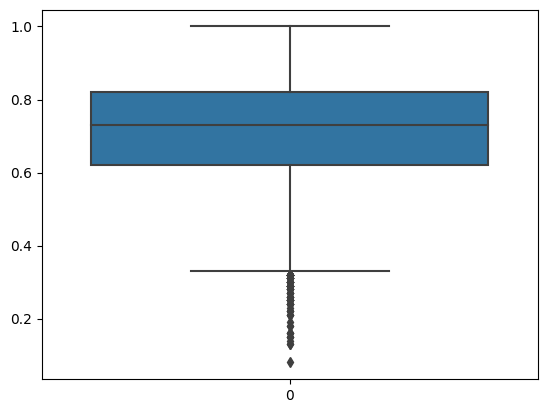

In [4]:
sns.boxplot(X.humidity)

Bigfoot semble aimer l'humidité.

<AxesSubplot: >

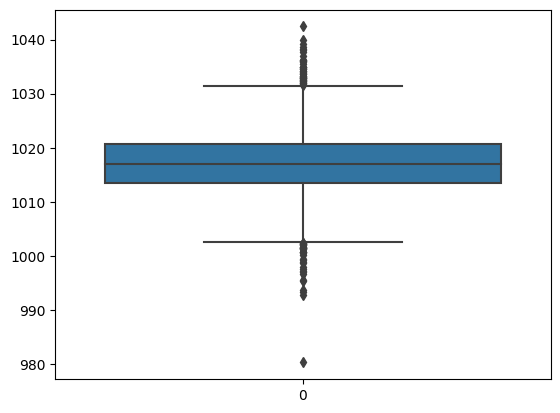

In [5]:
sns.boxplot(X.pressure)

La pression moyenne au États-Unis est la médiane.

<AxesSubplot: >

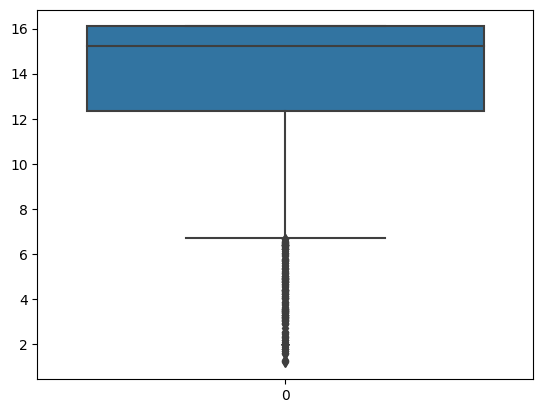

In [6]:
sns.boxplot(X.visibility_km)

<AxesSubplot: >

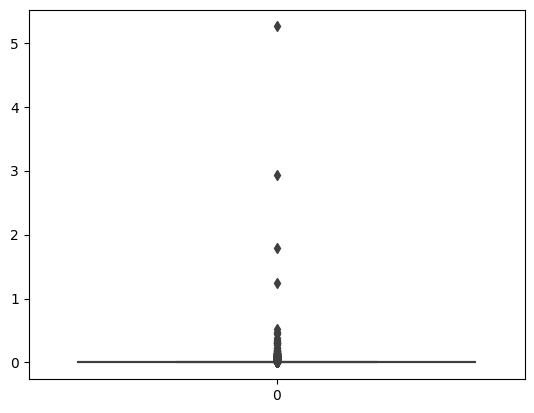

In [7]:
sns.boxplot(X.precip_intensity_cm)

Pas de pluie -> pas de problème de visibilité à cause de la pluie

<AxesSubplot: xlabel='wind_speed_kmh', ylabel='Count'>

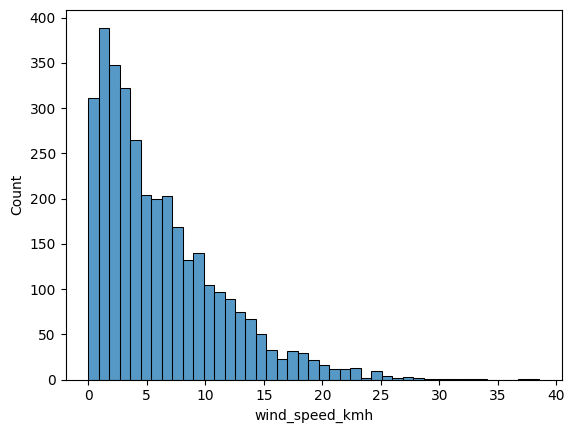

In [8]:
sns.histplot(X.wind_speed_kmh)

Peu de vent

### 3.1.2. Quanlitatif

In [9]:
weather = X.summary.value_counts().reset_index()
weather.columns = ["weather", "count"]
weather

weather  count
0                            Clear throughout the day.    754
1                    Mostly cloudy throughout the day.    332
2                                Foggy in the morning.    140
3                         Overcast throughout the day.    137
4                         Mostly cloudy until evening.    102
..                                                 ...    ...
316  Partly cloudy until afternoon and breezy start...      1
317  Partly cloudy throughout the day and breezy st...      1
318                          Light rain until evening.      1
319  Rain in the morning and breezy starting in the...      1
320               Light precipitation until afternoon.      1

[321 rows x 2 columns]

<AxesSubplot: xlabel='season', ylabel='count'>

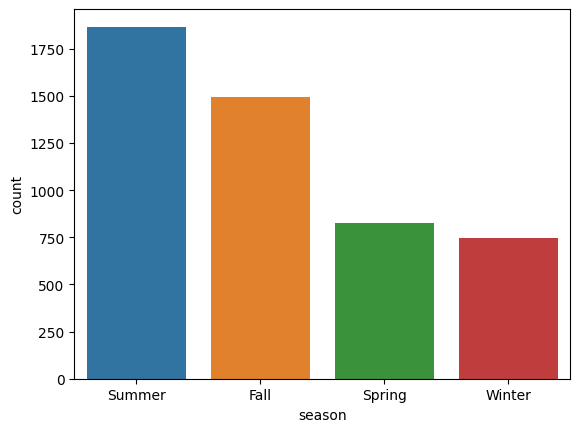

In [10]:
sns.countplot(x="season", data=X)

## 3.2. Visualisations multivariées

### 3.2.1 Quantitatif vs quantitatif

<AxesSubplot: xlabel='temperature_high', ylabel='temperature_low'>

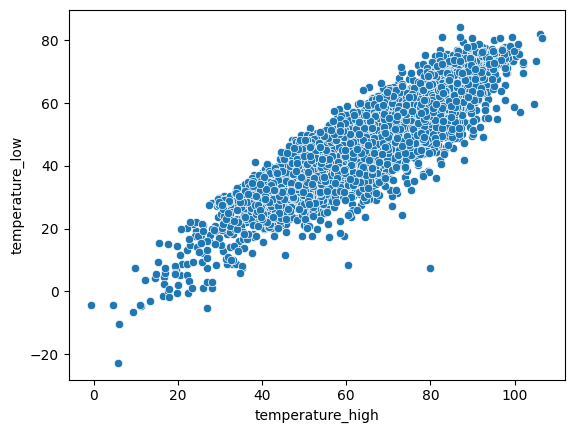

In [11]:
sns.scatterplot(x="temperature_high", y="temperature_low", data=X)

In [12]:
float_data = [
    'latitude',
    'longitude',
    'humidity',
    'cloud_cover',
    'moon_phase',
    'precip_probability',
    'pressure',
    'wind_bearing',
    'temperature_high_deg',
    'temperature_mid_deg',
    'temperature_low_deg',
    'dew_point_deg',
    'wind_speed_kmh',
    'precip_intensity_cm',
    'visibility_km'
    
]

<AxesSubplot: >

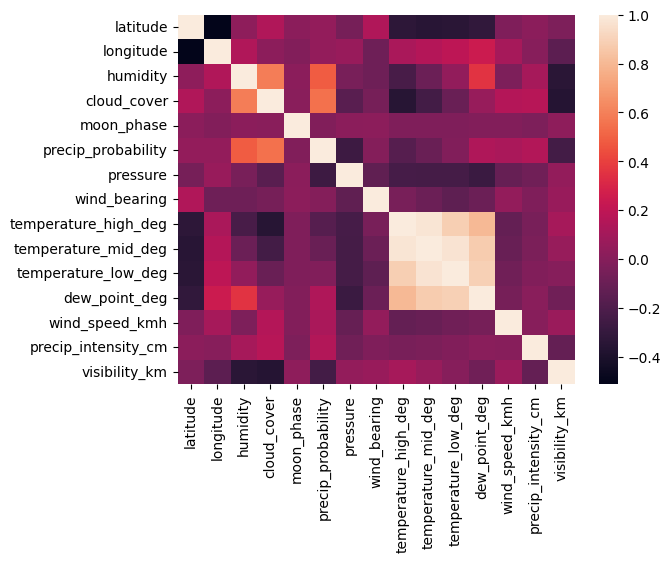

In [13]:
X_num = X[float_data]
corr = X_num.corr()
sns.heatmap(corr)

Corrélations positives:

    - cloud_cover-humidity-precip_probability

    - temperature_mid_deg-temperature_high_deg-temperature_low_deg-dew_point

### 3.2.2 Qualitatif vs quantitatif

<AxesSubplot: xlabel='uv_index', ylabel='season'>

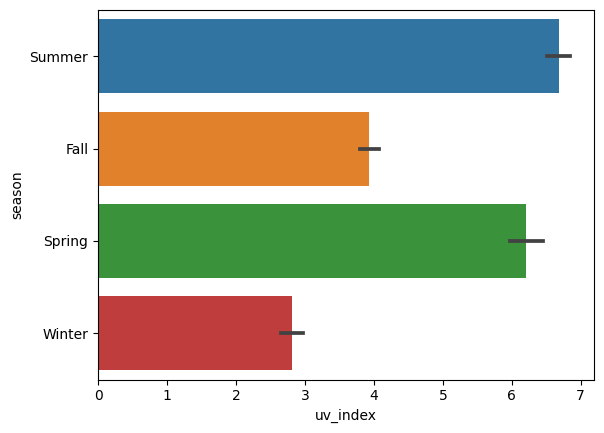

In [14]:
sns.barplot(x="uv_index", y="season", data=X)

<AxesSubplot: xlabel='season', ylabel='temperature_high_deg'>

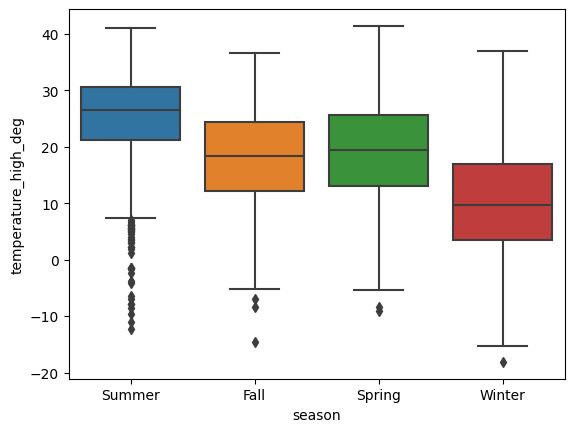

In [15]:
sns.boxplot(x="season", y="temperature_high_deg", data=X)

### 3.2.3 Qualitatif vs qualitatif

In [16]:
category_data = [
    'season',
    'classification',
    'precip_type'
]

<AxesSubplot: xlabel='season', ylabel='count'>

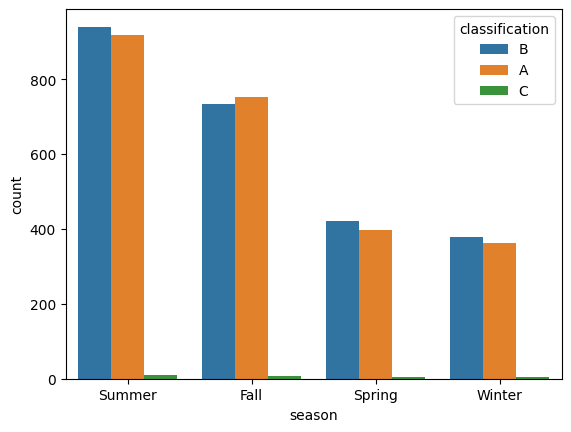

In [17]:
sns.countplot(x="season", hue="classification", data=X)

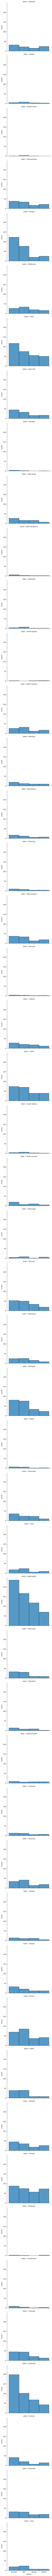

In [18]:
# sighting in state by season -> migration ?
sns.displot(x=X["season"], row=X["state"], kind="hist", data=X)

### 3.3 Représentations de coordonnées

https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html

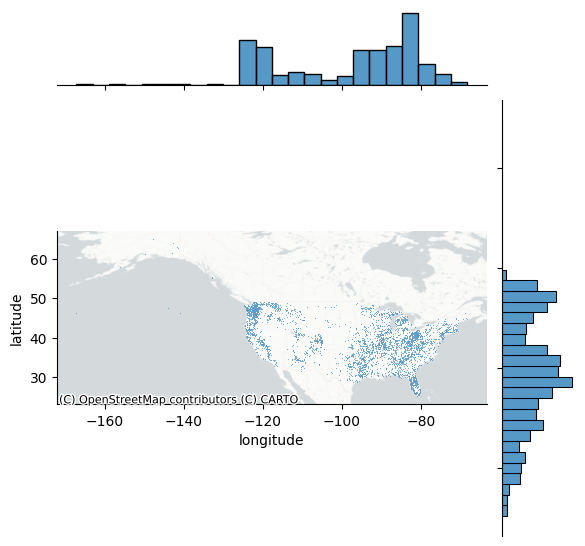

In [19]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x="longitude", y="latitude", data=X, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

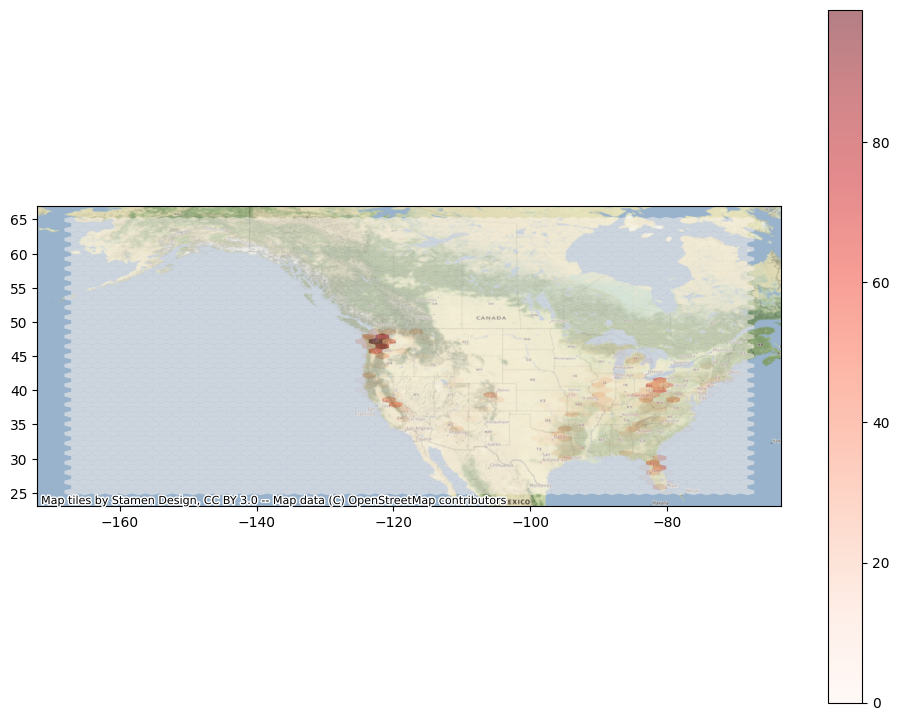

In [20]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    X["longitude"],
    X["latitude"],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="Reds",
)
# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    #source=contextily.providers.CartoDB.PositronNoLabels
)
# Add colorbar
plt.colorbar(hb)

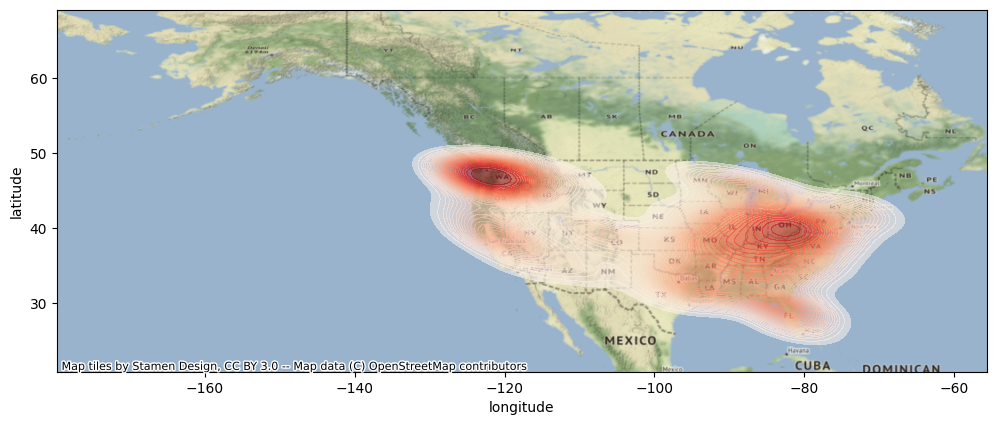

In [21]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    x="longitude",
    y="latitude",
    data=X,
    n_levels=35,
    fill=True,
    alpha=0.55,
    cmap="Reds",
)
# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    # source=contextily.providers.CartoDB.PositronNoLabels
)

In [22]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [23]:
states = pd.DataFrame(X.state.value_counts()).reset_index()
states.columns = ['state', 'count']
states = states.assign(
    code=states.state.replace(us_state_to_abbrev)
)

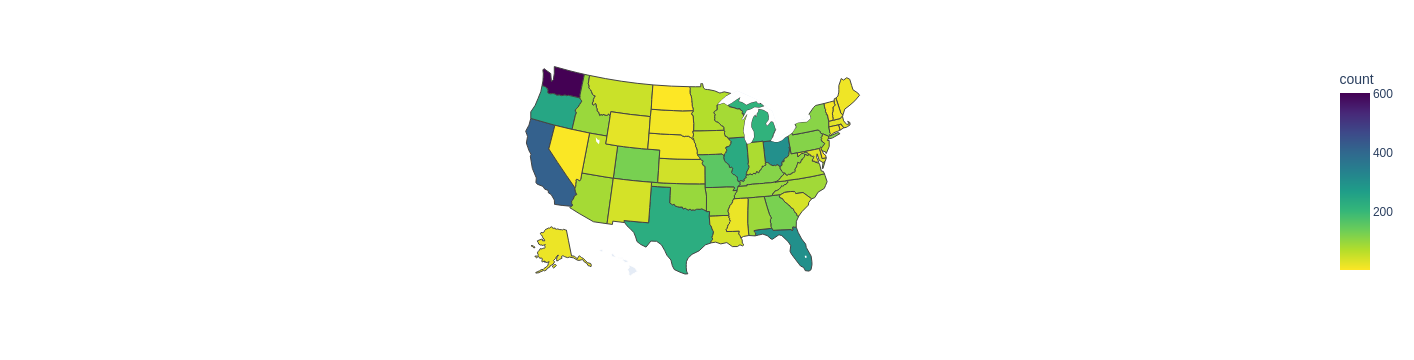

In [24]:
px.choropleth(
    states,
    locations='code',
    locationmode="USA-states",
    scope="usa",
    color="count",
    color_continuous_scale="Viridis_r", 
)